In [1]:
!pip install plotly_express

In [3]:
#데이터 읽어오기
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'

titanic = pd.read_excel(titanic_url)
titanic.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 데이터 탐색

In [4]:
#생존상황

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

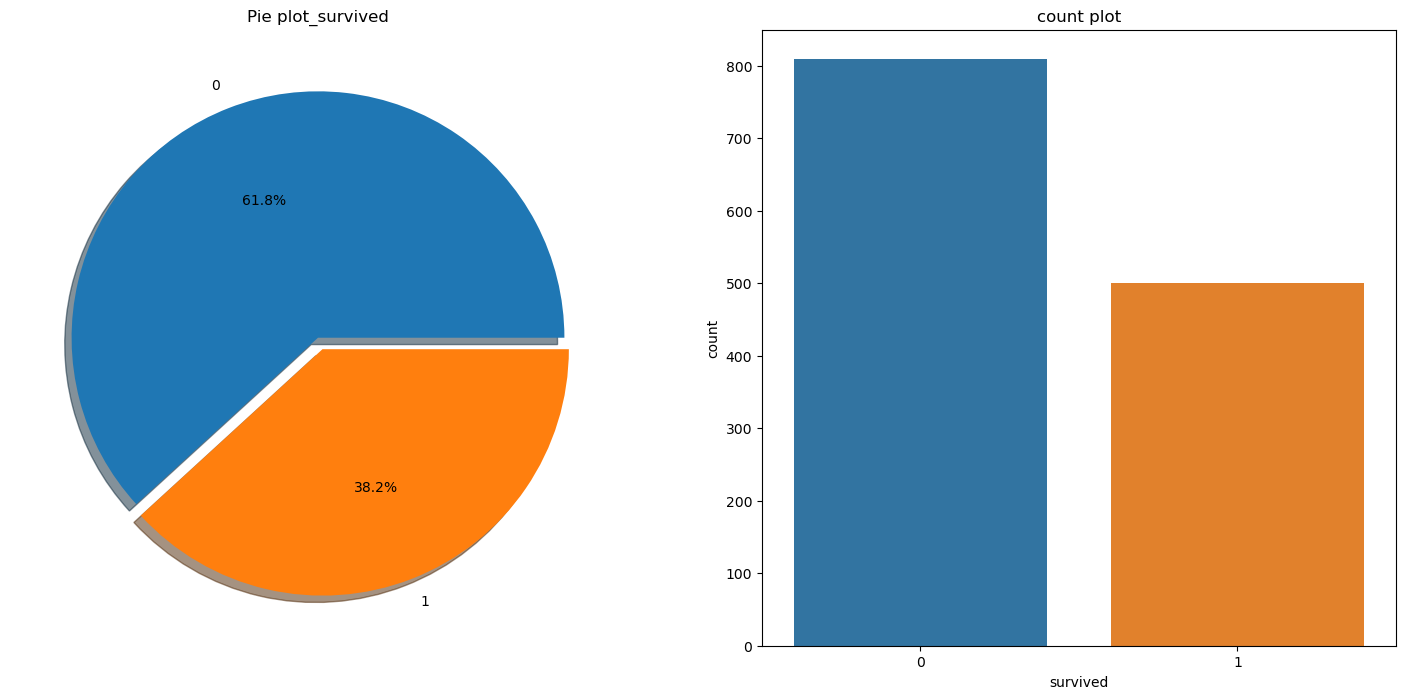

In [15]:
f,ax = plt.subplots(1,2, figsize=(18,8))
titanic['survived'].value_counts().plot.pie(ax= ax[0] , autopct='%1.1f%%', shadow= True, explode= (0, 0.05));
ax[0].set_title('Pie plot_survived');
ax[0].set_ylabel('');

sns.countplot( x= 'survived', data=titanic, ax=ax[1])
ax[1].set_title('count plot')


plt.show()

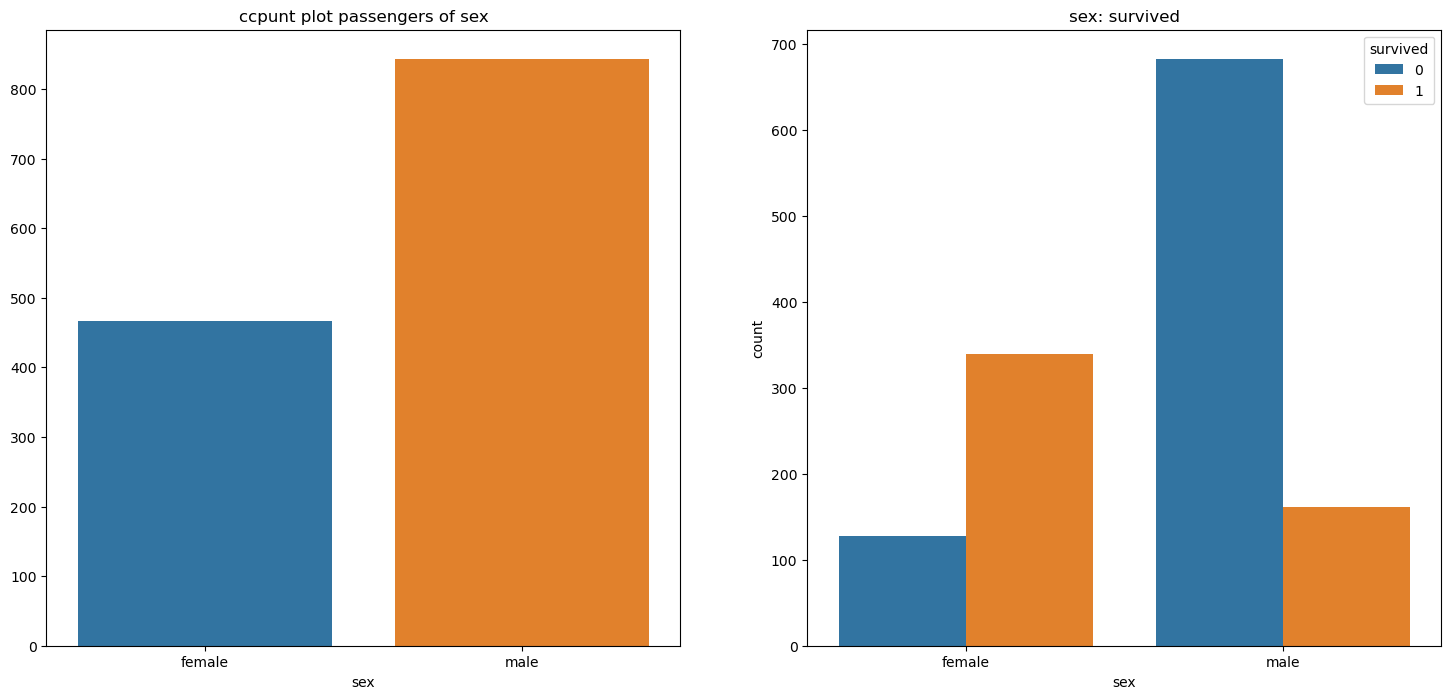

In [18]:
#성별에 따른 생존 상황
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.countplot( x= 'sex', data=titanic, ax=ax[0])
ax[0].set_title('ccpunt plot passengers of sex')
ax[0].set_ylabel('')

sns.countplot( x= 'sex',hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('sex: survived')


plt.show()

남성의 생존 가능성이 더 낮다 - 특이한점 1

- 파이썬 모듈에서 옵션이 자주 바뀌기 때문에 너무 사소한것에 집착하지 말자
- 집중해야할 것은 이 그래프를 그리는 목적이다. 

In [24]:
pd.crosstab(titanic.pclass,titanic.survived, margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


1등실의 생존 가능성이 아주 높다

그런데 여성의 생존률도 높다.

그럼 1등실에 여성이 많이 타고 있었나??

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


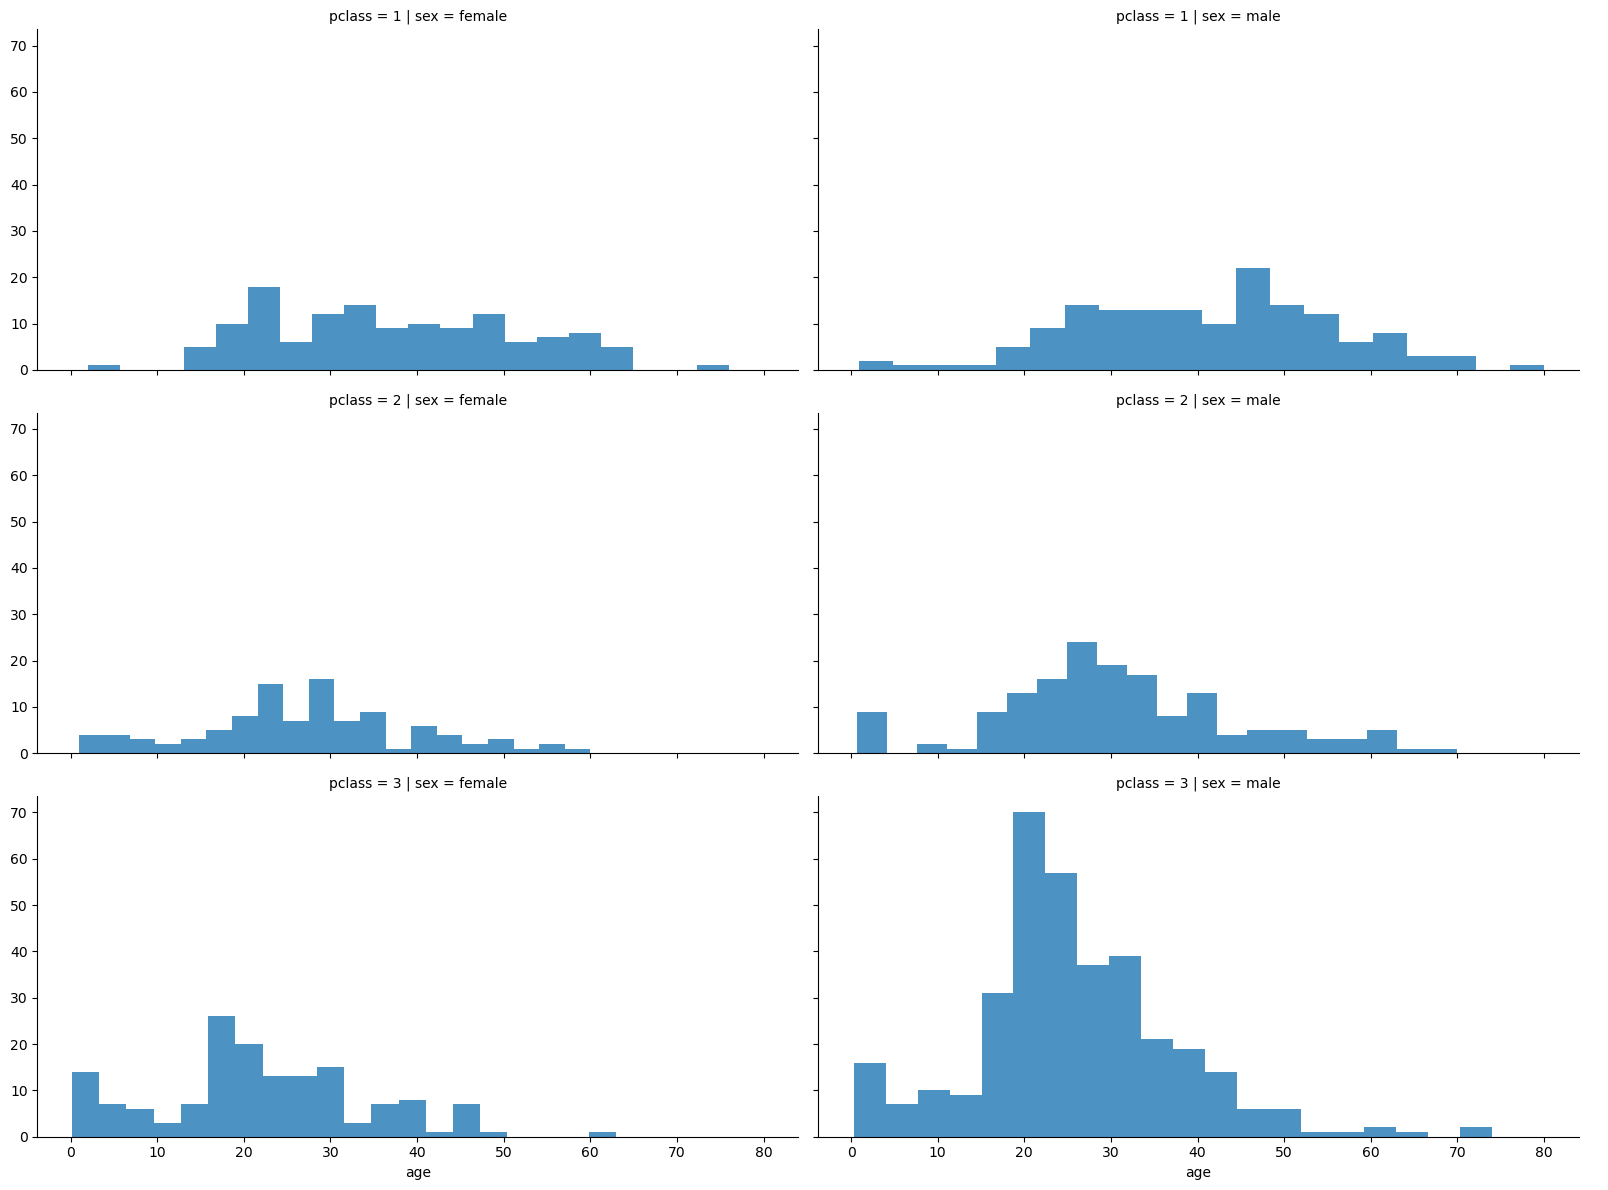

In [25]:
grid = sns.FacetGrid(titanic, row = 'pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist,'age', alpha=0.8, bins =20)
grid.add_legend();

3등실에는 남성이 많았다. - 특히 20대 남성

In [26]:
#나이별 승객현황

import plotly_express as px

In [27]:
fig = px.histogram(titanic, x= 'age')
fig.show()

아이들과 2030대가 많았다

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



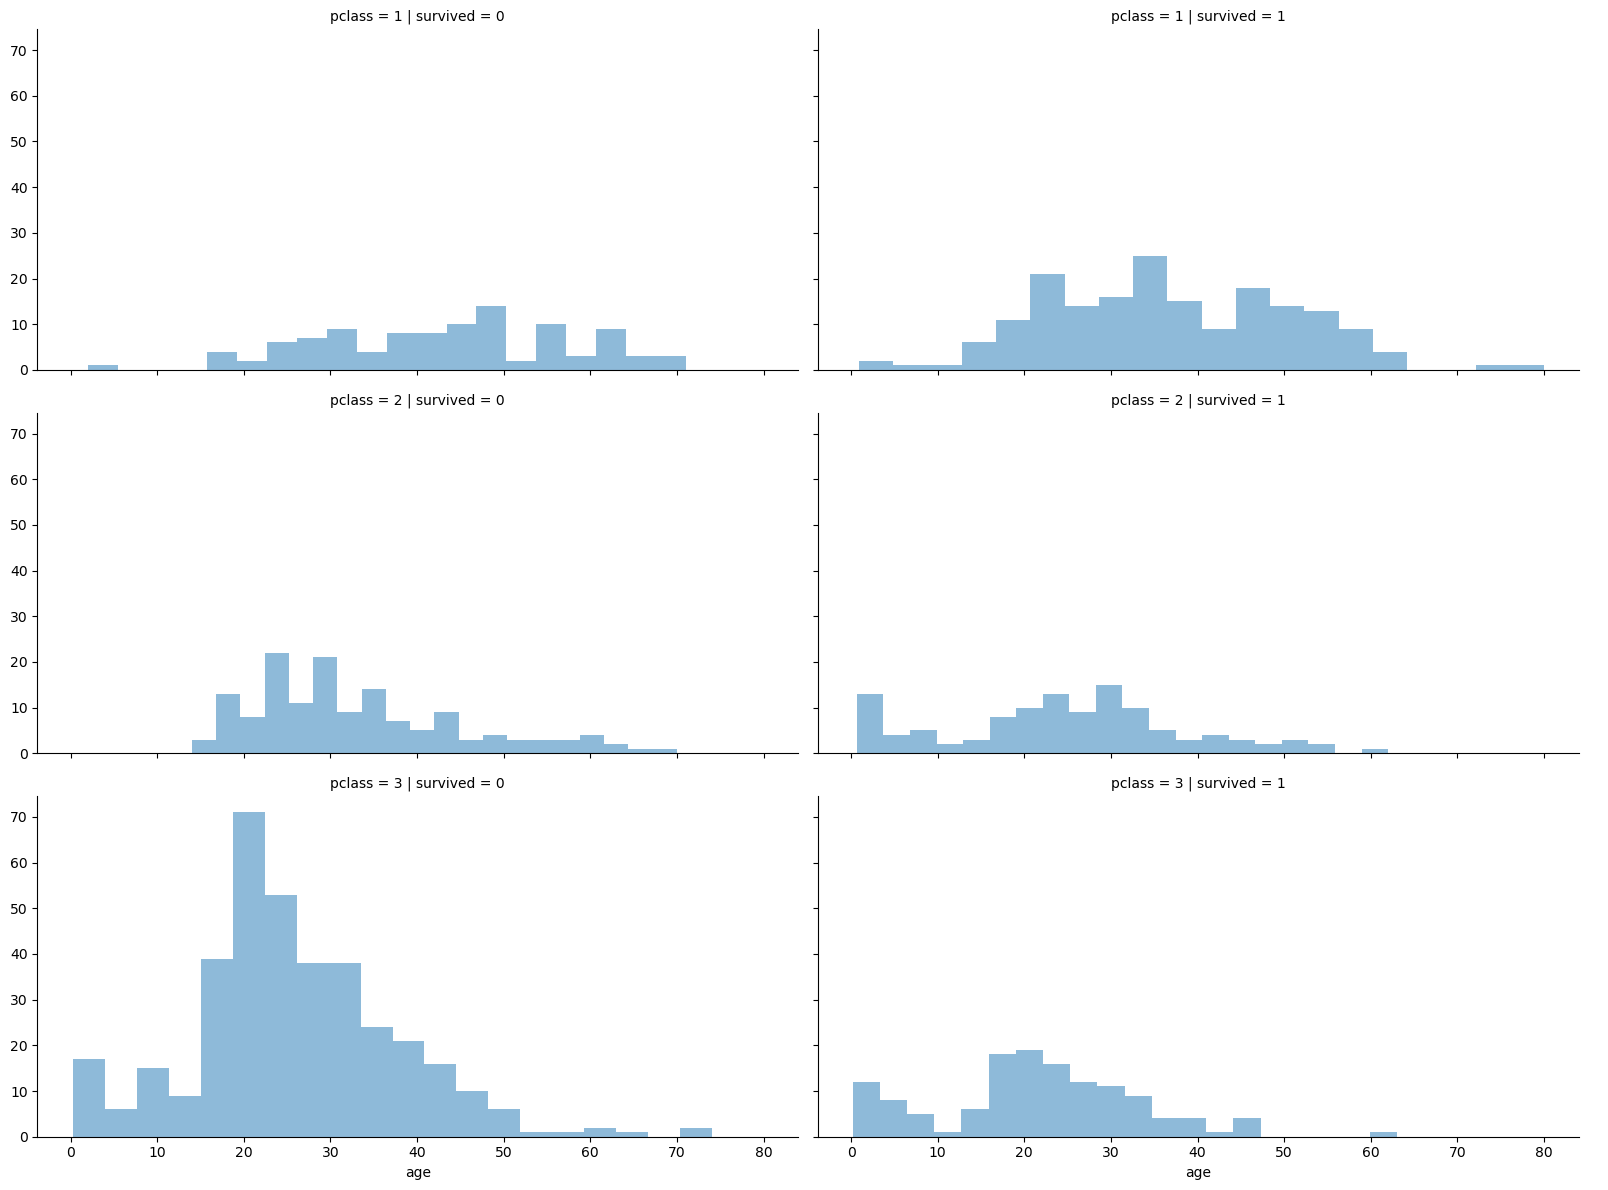

In [29]:
#등실별 생존률을 연령대별로 확인
grid = sns.FacetGrid(titanic, row = 'pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist,'age', alpha=0.5, bins =20)
grid.add_legend();

In [30]:
#나이를 5단계로 정리하기

titanic['age_cat']= pd.cut(titanic.age, bins=[0,7,15,30,60,100], include_lowest=True,
       labels=['baby','teen','young','adult','old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


<Axes: xlabel='sex', ylabel='survived'>

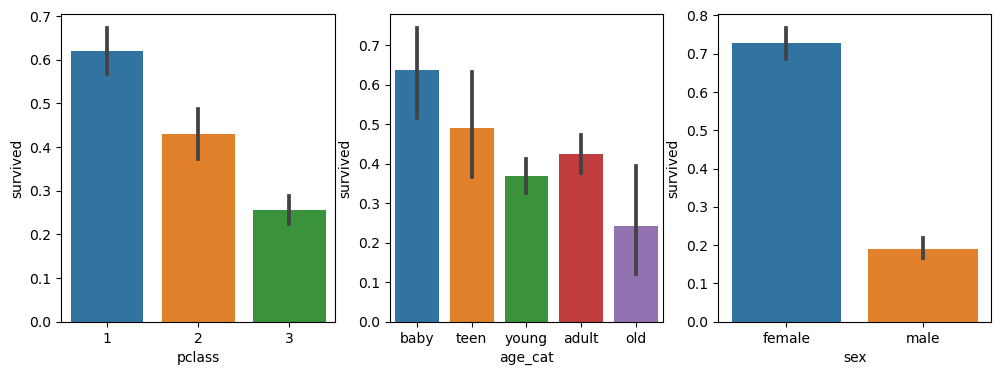

In [33]:
# 등실, 나이, 성별 생존률 한꺼번에 보기
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot(x= 'pclass',y= 'survived',data=titanic)

plt.subplot(132)
sns.barplot(x= 'age_cat',y= 'survived',data=titanic)

plt.subplot(133)
sns.barplot(x= 'sex',y= 'survived',data=titanic)


C:\Users\user\AppData\Local\Temp\ipykernel_7028\3938902678.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_7028\3938902678.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_7028\3938902678.py:14: UserWarning:



`distplot` is a de

Text(0.5, 1.0, 'Male')

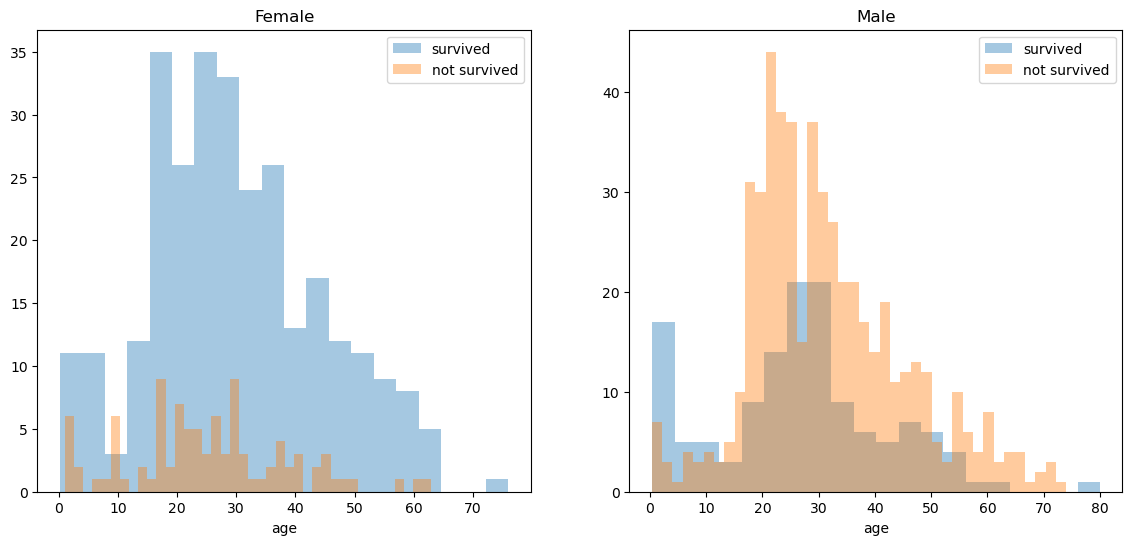

In [40]:
#남여 나이별 생존상황을 좀 더 들여다 보자

f, ax = plt.subplots(1,2,figsize=(14,6))

women = titanic[titanic.sex == 'female']
men = titanic[titanic.sex == 'male']

sns.distplot(women[women['survived']==1]['age'],bins=20,label='survived',ax=ax[0], kde=False)
sns.distplot(women[women['survived']==0]['age'],bins=40,label='not survived',ax=ax[0], kde=False)
ax[0].legend()
ax[0].set_title('Female')


sns.distplot(men[men['survived']==1]['age'],bins=20,label='survived',ax=ax[1], kde=False)
sns.distplot(men[men['survived']==0]['age'],bins=40,label='not survived',ax=ax[1], kde=False)
ax[1].legend()
ax[1].set_title('Male')



In [54]:
# 탑승객의 신분 파악하기
import re

title = []
for idx, dataset in titanic.iterrows():
    temp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.',temp).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [55]:
pd.crosstab(titanic.title,titanic.sex)

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [56]:
titanic.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [57]:
titanic['title'] = titanic['title'].replace('Mlle','Miss')
titanic['title'] = titanic['title'].replace('Ms','Miss')
titanic['title'] = titanic['title'].replace('Mme','Mrs')

Rare_f = ["Dona","Lady","the Countess"]
Rare_m = ["Capt","Don","Col","Major","Rev","Sir","Dr","Master","Jonkheer"]





In [58]:
for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each,'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each,'Rare_m')



In [59]:
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [60]:
titanic[['title','survived']].groupby('title',as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


# 머신러닝을 이용한 생존자예측

In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


머신러닝을 위해서 속성들의 값은 숫자가 되어야 한다

In [62]:
# 성별 데이터를 숫자로 바꾸는 작업 : Label Encoder()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])


LabelEncoder()

In [64]:
le.classes_

array(['female', 'male'], dtype=object)

In [65]:
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [66]:
# 결측치

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
 16  gender     1309 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 160.1+ KB


결측치는 지금은 포기하자

In [67]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


In [68]:
from sklearn.model_selection import train_test_split

x = titanic[['pclass','age','sibsp','parch','fare','gender']]
y = titanic['survived']

X_train, X_test , y_train, y_test = train_test_split(x,y,test_size=0.8,random_state= 13)


In [69]:
# 일단 Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth= 4, random_state=13)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [70]:
predict = dt.predict(X_test)
print(accuracy_score(y_test, predict))

0.7655502392344498


### 그럼 디카프리오 형님의 생존률은?

In [72]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]]) 
print('Dicaprio :',dt.predict_proba(dicaprio)[0,1])

Dicaprio : 0.22950819672131148


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [74]:
winslet = np.array([[1, 16, 1, 1, 100, 0]]) 
print('Winslet :',dt.predict_proba(winslet)[0,1])

Winslet : 1.0


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



디카프리오는 30%확률로 살아남고 윈슬릿은 100%확률로 살아남을 것이다.

#### 몇가지 하고싶은 이야기 

1. **마크다운** : 실무에서 보고서도 jupyter 마크다운을 통해서 코드와 함께 작성할 수 있다. 문서로써의 가치를 가진다. 

2. **데이터 과학은?** : 데이터 과학의 목적 중 하나는 가정(인식)을 검증하는 것이다. 예를 들어, 나이팅게일 언니(나라를 운용할 사람들은 통게활용법을 배워야한다).  

3. **왜 파이썬인가요?** : 아는 만큼 보이고, 읽기 쉽다

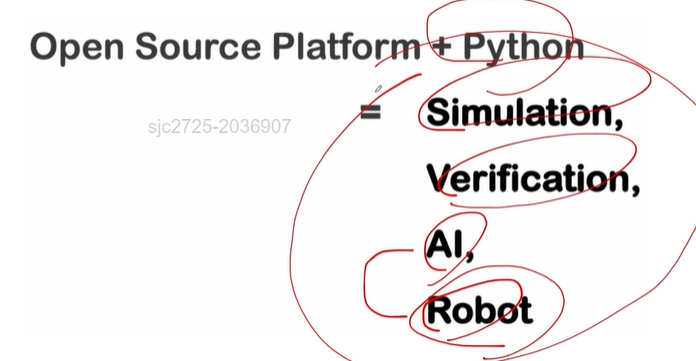

4. **open source** : 위력이 엄청나다. 오픈해버리면 엄청난 발전과 상호 검증 사용자의 피드백 마켓 규모 및 성향 파악이 가능.

